In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
nobels = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/LinkedIn Learning - Data analysis Python course/chapter6/nobels.csv', names=['year','discipline','nobelist'])

In [3]:
nobels.size

2850

In [4]:
len(nobels)

950

In [5]:
nobels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
year          950 non-null int64
discipline    950 non-null object
nobelist      950 non-null object
dtypes: int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
nobels['discipline'].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [9]:
nobels['nobelist'].value_counts().head()

International Committee of the Red Cross    3
John Bardeen                                2
Marie Curie                                 2
Linus Pauling                               2
Frederick Sanger                            2
Name: nobelist, dtype: int64

In [18]:
[nobels['discipline'] == 'Chemistry'] # True False filter

[0       True
 1      False
 2      False
 3      False
 4      False
 5      False
 6       True
 7      False
 8      False
 9      False
 10     False
 11     False
 12     False
 13      True
 14     False
 15     False
 16     False
 17     False
 18     False
 19     False
 20      True
 21     False
 22     False
 23     False
 24     False
 25     False
 26      True
 27     False
 28     False
 29     False
        ...  
 920    False
 921    False
 922    False
 923     True
 924     True
 925     True
 926    False
 927    False
 928    False
 929    False
 930    False
 931    False
 932    False
 933    False
 934    False
 935    False
 936     True
 937     True
 938     True
 939    False
 940    False
 941    False
 942    False
 943    False
 944    False
 945    False
 946    False
 947    False
 948    False
 949    False
 Name: discipline, Length: 950, dtype: bool]

In [14]:
nobels[nobels['discipline'] == 'Chemistry'].head() # Use the filter to display results

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
6,1902,Chemistry,Hermann Emil Fischer
13,1903,Chemistry,Svante Arrhenius
20,1904,Chemistry,William Ramsay
26,1905,Chemistry,Adolf von Baeyer


In [21]:
# Another way

nobels.query('discipline == "Chemistry"').head()

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
6,1902,Chemistry,Hermann Emil Fischer
13,1903,Chemistry,Svante Arrhenius
20,1904,Chemistry,William Ramsay
26,1905,Chemistry,Adolf von Baeyer


In [22]:
nobels[nobels['nobelist'].str.contains('Curie')]

,year,discipline,nobelist
18,1903,Physics,Marie Curie
19,1903,Physics,Pierre Curie
62,1911,Chemistry,Marie Curie
178,1935,Chemistry,Frédéric Joliot-Curie
179,1935,Chemistry,Irène Joliot-Curie


In [23]:
nobels.index

RangeIndex(start=0, stop=950, step=1)

In [24]:
nobels_by_year = nobels.set_index('year') # New data-frame with new index

In [25]:
nobels_by_year.head()

,discipline,nobelist
year,,
1901,Chemistry,Jacobus Henricus van 't Hoff
1901,Literature,Sully Prudhomme
1901,Medicine,Emil Adolf von Behring
1901,Peace,Frédéric Passy
1901,Peace,Henry Dunant


In [26]:
nobels_by_year.index

Int64Index([1901, 1901, 1901, 1901, 1901, 1901, 1902, 1902, 1902, 1902,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='year', length=950)

In [27]:
nobels_by_year.loc[1901]

,discipline,nobelist
year,,
1901,Chemistry,Jacobus Henricus van 't Hoff
1901,Literature,Sully Prudhomme
1901,Medicine,Emil Adolf von Behring
1901,Peace,Frédéric Passy
1901,Peace,Henry Dunant
1901,Physics,Wilhelm Röntgen


In [28]:
nobels_by_year.loc[1901, 'nobelist']

year
1901    Jacobus Henricus van 't Hoff
1901                 Sully Prudhomme
1901          Emil Adolf von Behring
1901                  Frédéric Passy
1901                    Henry Dunant
1901                 Wilhelm Röntgen
Name: nobelist, dtype: object

In [30]:
nobels_by_year.loc[1901]['nobelist']

year
1901    Jacobus Henricus van 't Hoff
1901                 Sully Prudhomme
1901          Emil Adolf von Behring
1901                  Frédéric Passy
1901                    Henry Dunant
1901                 Wilhelm Röntgen
Name: nobelist, dtype: object

In [31]:
nobels_by_year.loc[1914:1918]

,discipline,nobelist
year,,
1914,Chemistry,Theodore William Richards
1914,Medicine,Robert Bárány
1914,Physics,Max von Laue
1915,Chemistry,Richard Willstätter
1915,Literature,Romain Rolland
1915,Physics,William Henry Bragg
1915,Physics,William Lawrence Bragg
1916,Literature,Verner von Heidenstam
1917,Literature,Henrik Pontoppidan


In [32]:
nobels_by_year.iloc[0:10]

,discipline,nobelist
year,,
1901,Chemistry,Jacobus Henricus van 't Hoff
1901,Literature,Sully Prudhomme
1901,Medicine,Emil Adolf von Behring
1901,Peace,Frédéric Passy
1901,Peace,Henry Dunant
1901,Physics,Wilhelm Röntgen
1902,Chemistry,Hermann Emil Fischer
1902,Literature,Theodor Mommsen
1902,Medicine,Ronald Ross


In [33]:
nobels_multi_index = nobels.set_index(['year','discipline'])

In [34]:
nobels_multi_index.head()

nobelist
year discipline                              
1901 Chemistry   Jacobus Henricus van 't Hoff
     Literature               Sully Prudhomme
     Medicine          Emil Adolf von Behring
     Peace                     Frédéric Passy
     Peace                       Henry Dunant

In [35]:
nobels_multi_index.index.get_level_values(0)

Int64Index([1901, 1901, 1901, 1901, 1901, 1901, 1902, 1902, 1902, 1902,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='year', length=950)

In [36]:
nobels_multi_index.index.get_level_values(1)

Index(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Peace', 'Physics',
       'Chemistry', 'Literature', 'Medicine', 'Peace',
       ...
       'Economics', 'Economics', 'Literature', 'Medicine', 'Medicine',
       'Medicine', 'Peace', 'Physics', 'Physics', 'Physics'],
      dtype='object', name='discipline', length=950)

In [37]:
nobels_multi_index.loc[(2017, 'Physics')]

nobelist
year discipline              
2017 Physics     Barry Barish
     Physics       Kip Thorne
     Physics     Rainer Weiss

In [43]:
nobels_multi_index.loc[(slice(1901,1910), 'Physics'), :] # rows should be sliced, colummns should be all as shown by ":"

nobelist
year discipline                                
1901 Physics                    Wilhelm Röntgen
1902 Physics                    Hendrik Lorentz
     Physics                      Pieter Zeeman
1903 Physics                    Henri Becquerel
     Physics                        Marie Curie
     Physics                       Pierre Curie
1904 Physics                      Lord Rayleigh
1905 Physics                     Philipp Lenard
1906 Physics                      J. J. Thomson
1907 Physics           Albert Abraham Michelson
1908 Physics                   Gabriel Lippmann
1909 Physics                  Guglielmo Marconi
     Physics               Karl Ferdinand Braun
1910 Physics     Johannes Diderik van der Waals

In [51]:
nobels_multi_index.loc[ (slice(None), ['Chemistry','Physics']), :].head()

# slice(None) means no slicing is needed

nobelist
year discipline                              
1901 Chemistry   Jacobus Henricus van 't Hoff
     Physics                  Wilhelm Röntgen
1902 Chemistry           Hermann Emil Fischer
     Physics                  Hendrik Lorentz
     Physics                    Pieter Zeeman

In [49]:
nobels_multi_index.loc[ (['Chemistry','Physics']), :]

,,nobelist
year,discipline,


In [53]:
nobels[(nobels.year >= 1901) & (nobels.year <= 1905) & (nobels.discipline == 'Chemistry')]

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
6,1902,Chemistry,Hermann Emil Fischer
13,1903,Chemistry,Svante Arrhenius
20,1904,Chemistry,William Ramsay
26,1905,Chemistry,Adolf von Baeyer


In [54]:
nobels.query('year >= 1901 and year <= 1905 and discipline == "Chemistry"')

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
6,1902,Chemistry,Hermann Emil Fischer
13,1903,Chemistry,Svante Arrhenius
20,1904,Chemistry,William Ramsay
26,1905,Chemistry,Adolf von Baeyer


In [55]:
gapminder = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/LinkedIn Learning - Data analysis Python course/chapter6/gapminder.csv')

In [56]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0


In [57]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000


In [64]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita'] / 365.25)

gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314


In [65]:
gapminder_by_year = gapminder.set_index('year').sort_index()

gapminder_by_year.head()

,country,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
year,,,,,,,,
1800,Afghanistan,Asia,3280000.0,28.21,53.142,7.00,603.0,0.217727
1800,Guyana,America,166034.0,31.12,57.084,5.01,1214.0,0.521628
1800,Guinea-Bissau,Africa,218167.0,32.00,58.256,7.25,777.0,0.327831
1800,Guinea,Africa,983959.0,29.50,54.940,6.11,450.0,0.090622
1800,Guatemala,America,458965.0,25.80,49.664,6.45,857.0,0.370391


In [66]:
gapminder_by_country = gapminder.set_index('country').sort_index()

gapminder_by_country.head()

,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
country,,,,,,,,
Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,0.217727
Afghanistan,1993,Asia,14824371.0,49.50,83.800,7.76,810.0,0.345895
Afghanistan,1992,Asia,13745630.0,49.40,83.220,7.73,941.0,0.410999
Afghanistan,1991,Asia,12789374.0,49.30,82.580,7.70,1022.0,0.446861
Afghanistan,1990,Asia,12067570.0,49.50,81.900,7.69,1028.0,0.449403


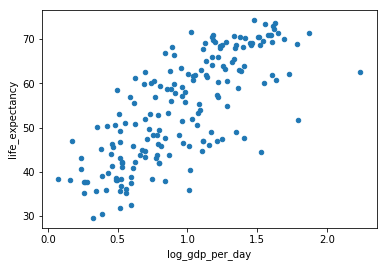

In [67]:
gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy')

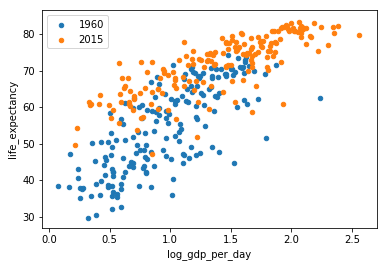

In [69]:
# to superimpose multiple Pandas plots, save the axes object returned by the first,
# pass it as "ax" to further plots

axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1960)

gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'life_expectancy', label=2015, color='C1', ax=axes)

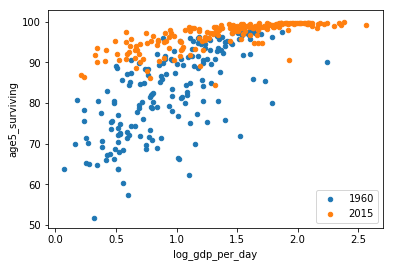

In [70]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'age5_surviving', label=1960)

gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'age5_surviving', label=2015, color='C1', ax=axes)

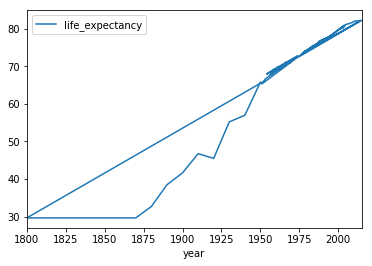

In [71]:
gapminder_by_country.loc['Italy'].plot('year', 'life_expectancy')

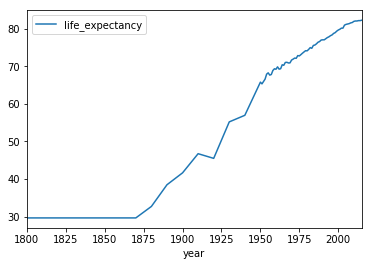

In [72]:
gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy')

Text(0, 0.5, 'life expectancy')

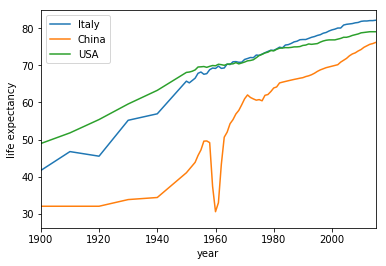

In [73]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy')

gapminder_by_country.loc['China'].sort_values('year').plot('year', 'life_expectancy', label='China', ax=axes)

gapminder_by_country.loc['United States'].sort_values('year').plot('year', 'life_expectancy', label='USA', ax=axes)

pp.axis(xmin=1900)
pp.ylabel('life expectancy')

In [74]:
gapminder.babies_per_woman.mean()

4.643471506105834

Text(0, 0.5, 'age 5 survival [%]')

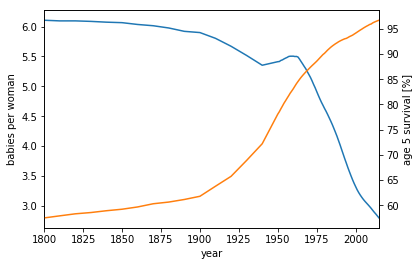

In [75]:
gapminder.groupby('year').babies_per_woman.mean().plot()
pp.ylabel('babies per woman')

# with secondary_y = True, the second plot generate a second set of axis labels
gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
pp.ylabel('age 5 survival [%]')

In [77]:
# pivot table: segment babies_per_woman data by both year and region, then take mean 
gapminder.pivot_table('babies_per_woman', 'year', 'region').head()

region,Africa,America,Asia,Europe
year,,,,
1800,6.393208,6.055758,6.291923,5.561628
1810,6.394151,6.040000,6.281154,5.540233
1820,6.394340,6.031515,6.292692,5.545909
1830,6.395472,6.046364,6.285577,5.506591
1840,6.396226,6.046970,6.255577,5.486591


Text(0.5, 1.0, 'babies per woman')

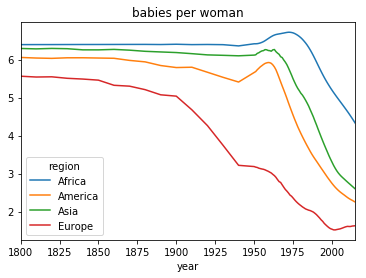

In [78]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()
pp.title('babies per woman')

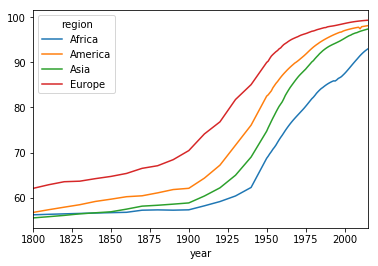

In [79]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()

### Baby names exercise

In [80]:
import zipfile

In [81]:
zipfile.ZipFile('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/LinkedIn Learning - Data analysis Python course/chapter7/names.zip').extractall('.')

In [82]:
ls

 Volume in drive C is Drive
 Volume Serial Number is 24F2-EDA2

 Directory of C:\Users\Public.DESKTOP-6RBQT7L\Desktop\Programming - Maths\LinkedIn Learning - Data analysis Python course

04-Apr-20  14:10    <DIR>          .
04-Apr-20  14:10    <DIR>          ..
04-Apr-20  08:20    <DIR>          .ipynb_checkpoints
03-Apr-20  20:36    <DIR>          __pycache__
28-Mar-20  20:13    <DIR>          chapter2
31-Mar-20  06:40    <DIR>          chapter3
02-Apr-20  07:14    <DIR>          chapter4
04-Apr-20  05:46    <DIR>          chapter5
31-Jan-20  08:10    <DIR>          chapter6
31-Jan-20  08:10    <DIR>          chapter7
29-Jan-20  19:00             6,908 getweather.py
04-Apr-20  05:44         3,218,400 HILO.dly
04-Apr-20  06:09         4,387,230 MINNEAPOLIS.dly
04-Apr-20  14:10    <DIR>          names
04-Apr-20  06:09         4,092,120 NEW YORK.dly
31-Mar-20  06:37            24,685 Notebook-1.ipynb
01-Apr-20  06:12            22,373 Notebook-2.ipynb
03-Apr-20  20:30         1,201,562 N

In [85]:
ls names

 Volume in drive C is Drive
 Volume Serial Number is 24F2-EDA2

 Directory of C:\Users\Public.DESKTOP-6RBQT7L\Desktop\Programming - Maths\LinkedIn Learning - Data analysis Python course\names

04-Apr-20  14:10    <DIR>          .
04-Apr-20  14:10    <DIR>          ..
04-Apr-20  14:10           316,364 NationalReadMe.pdf
04-Apr-20  14:10            24,933 yob1880.txt
04-Apr-20  14:10            24,065 yob1881.txt
04-Apr-20  14:10            26,559 yob1882.txt
04-Apr-20  14:10            26,002 yob1883.txt
04-Apr-20  14:10            28,670 yob1884.txt
04-Apr-20  14:10            28,625 yob1885.txt
04-Apr-20  14:10            29,822 yob1886.txt
04-Apr-20  14:10            29,531 yob1887.txt
04-Apr-20  14:10            33,064 yob1888.txt
04-Apr-20  14:10            32,297 yob1889.txt
04-Apr-20  14:10            33,621 yob1890.txt
04-Apr-20  14:10            33,186 yob1891.txt
04-Apr-20  14:10            36,542 yob1892.txt
04-Apr-20  14:10            35,433 yob1893.txt
04-Apr-20  14:10    

In [86]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [88]:
pd.read_csv('names/yob2011.txt').head()

,Sophia,F,21842
0,Isabella,F,19910
1,Emma,F,18803
2,Olivia,F,17322
3,Ava,F,15503
4,Emily,F,14258


In [91]:
pd.read_csv('names/yob2011.txt', names=['name', 'gender', 'count']).head()

,name,gender,count
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
4,Ava,F,15503


In [92]:
# load CSV file as DataFrame, then create a new column "year" with all elements set to 2011
pd.read_csv('names/yob2011.txt', names=['name','sex','number']).assign(year=2011).head()

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011


In [96]:
# for each year in 1880-2018, load the corresponding CSV file names/yobXXXX.txt
# as DataFrame, create new column "year" with all elements set to loop variable,
# then concatenate all DataFrames into a single one
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt',
                                 names=['name','gender','count']).assign(year=year)
                     for year in range(1880, 2019))

In [97]:
allyears.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [99]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
name      object
gender    object
count     int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [100]:
allyears.year.min(), allyears.year.max()

(1880, 2018)

In [101]:
# save DataFrame to compressed CSV file, dropping uninteresting index

allyears.to_csv('allyears.csv.gz', index=False)

In [102]:
allyears = pd.read_csv('allyears.csv.gz')

In [103]:
allyears.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [104]:
allyears_indexed = allyears.set_index(['gender','name','year']).sort_index()

In [106]:
allyears_indexed.head(15)

count
gender name      year       
F      Aabha     2011      7
                 2012      5
                 2014      9
                 2015      7
                 2016      7
       Aabidah   2018      5
       Aabriella 2008      5
                 2014      5
                 2015      5
                 2016     11
                 2017      6
                 2018      6
       Aada      2015      5
                 2018      8
       Aadaya    2018      8

In [114]:
allyears_indexed.loc[('M','Nikhil')].head(10)

,count
year,
1971,9
1973,8
1974,10
1975,12
1976,14
1977,12
1978,26
1979,21
1980,23


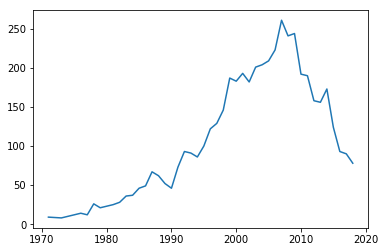

In [115]:
pp.plot(allyears_indexed.loc[('M','Nikhil')])

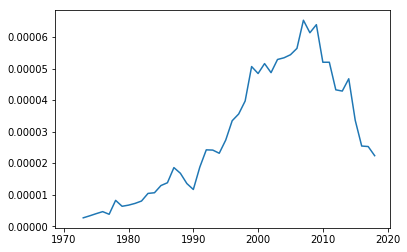

In [116]:
# Plot the same graph as above, but this time 'Nikhil' as a percentage of all names

pp.plot(allyears_indexed.loc[('M','Nikhil')] / allyears.groupby('year').sum())

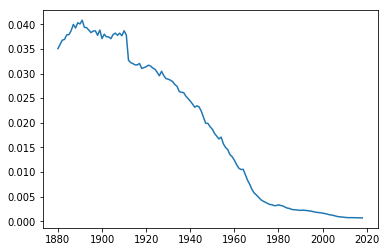

In [117]:
# Let's see the same percentage graph for another name

pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [118]:
# Function for the same

def plotname(gender, name):
    data = allyears_indexed.loc[(gender,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2018)

In [119]:
# Another function to compare several names and plot them together

def comparenames(gender, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(gender, name)

    pp.legend()

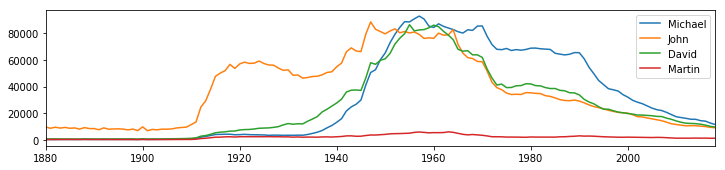

In [120]:
comparenames('M', ['Michael','John','David','Martin'])

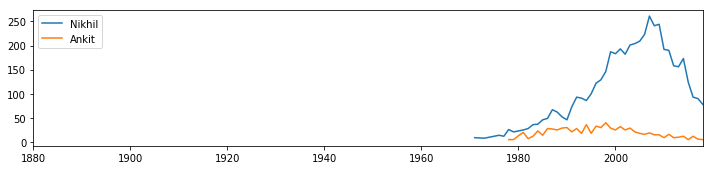

In [121]:
comparenames('M', ['Nikhil','Ankit'])

In [122]:
allyears_byyear = allyears.set_index(['gender','year']).sort_index()

In [123]:
allyears_byyear.head()

name  count
gender year                  
F      1880       Mary   7065
       1880       Anna   2604
       1880       Emma   2003
       1880  Elizabeth   1939
       1880     Minnie   1746

In [126]:
allyears_byyear.loc['M',2018].sort_values('count', ascending=False).head(10)

name  count
gender year                 
M      2018      Liam  19837
       2018      Noah  18267
       2018   William  14516
       2018     James  13525
       2018    Oliver  13389
       2018  Benjamin  13381
       2018    Elijah  12886
       2018     Lucas  12585
       2018     Mason  12435
       2018     Logan  12352

In [127]:
allyears_byyear.loc['F',2018].sort_values('count', ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [130]:
# get the top ten names for sex and year

def getyear(gender, year):
    return (allyears_byyear.loc[gender, year]          # select M/F, year
               .sort_values('count', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [131]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [132]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [136]:
# similar to plotname in 07_03_popularity, but using a query on unindexed data
def plotname(gender, name):
    data = allyears.query('gender == @gender and name == @name')
    
    pp.plot(data.year, data.count, label=name)
    pp.axis(xmin=1880, xmax=2018)

In [139]:
list(getyear('M',2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

In [141]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('count', ascending=False).head(10)

In [142]:
alltime_f.head()

,count
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668


### Finding top 10 unisex names i.e. used in both genders M & F

In [146]:
totals = allyears.groupby(['gender','name'])['count'].sum()

In [148]:
totals.head(15)

gender  name       
F       Aabha            35
        Aabidah           5
        Aabriella        38
        Aada             13
        Aadaya            8
        Aaden             5
        Aadhira         107
        Aadhvika         17
        Aadhya         1725
        Aadhyareddy       6
        Aadhyasri         6
        Aadi             16
        Aadilynn          5
        Aadison          11
        Aaditri          53
Name: count, dtype: int64

In [149]:
# split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

In [151]:
(totals.loc['M'] / totals.loc['F'] < 2).head(10)

name
Aaban        False
Aabha        False
Aabid        False
Aabidah      False
Aabir        False
Aabriella    False
Aada         False
Aadam        False
Aadan        False
Aadarsh      False
Name: count, dtype: bool

In [152]:
# compute ratio of male and female totals (Pandas aligns axes automatically);
# drop NaNs that occur where only one Series has a value
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

In [154]:
ratios[(ratios > 0.5) & (ratios < 2)].head()

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
Name: count, dtype: float64

In [155]:
# names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [156]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [157]:
# sorted and capped M + F totals for unisex names;
# results in array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [158]:
common.head()

name
Jessie    277674
Riley     201179
Casey     186947
Jackie    169199
Peyton    120657
Name: count, dtype: int64

In [160]:
allyears_indexed = allyears.set_index(['gender','name','year']).sort_index()

In [161]:
allyears_indexed.head(10)

count
gender name      year       
F      Aabha     2011      7
                 2012      5
                 2014      9
                 2015      7
                 2016      7
       Aabidah   2018      5
       Aabriella 2008      5
                 2014      5
                 2015      5
                 2016     11

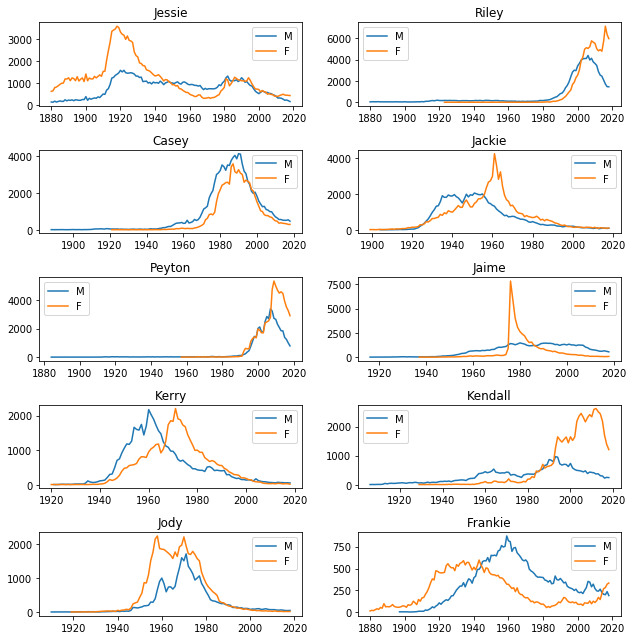

In [162]:
pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)

    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()